# Universidad del Valle de Guatemala
## Security Data Science - 10
* Walter Danilo Saldaña Salguero - 19897
* Javier Alejandro Cotto Argueta - 19324

## Laboratorio 6: Clasificación de Malware con DL

Importamos librearias

In [98]:
import os, cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Creamos el Dataset

In [67]:
from tabulate import tabulate

path = './malimg_paper_dataset_imgs/'

family_quantity = 0
ids = 0
columns = ['id', 'familyId', 'familyName', 'file', 'path', 'height', 'width']
data = []
for folder in os.listdir(path):
    if ('.txt' in folder): continue
    cont = 0
    full_path = path + folder + '/'
    for file in os.listdir(full_path):
        full_file_path = full_path + file
        img = cv2.imread(full_file_path, cv2.IMREAD_UNCHANGED)
        height, width = img.shape
        data.append([id, family_quantity, folder, file, full_file_path, height, width])
        cont += 1
        ids += 1
    print("Los ejemplares de la familia ", family_quantity, folder, " son\n", cont)
    family_quantity += 1
data = pd.DataFrame(data=data, columns=columns)

Los ejemplares de la familia  0 Adialer.C  son
 122
Los ejemplares de la familia  1 Agent.FYI  son
 116
Los ejemplares de la familia  2 Allaple.A  son
 2949
Los ejemplares de la familia  3 Allaple.L  son
 1591
Los ejemplares de la familia  4 Alueron.gen!J  son
 198
Los ejemplares de la familia  5 Autorun.K  son
 106
Los ejemplares de la familia  6 C2LOP.gen!g  son
 200
Los ejemplares de la familia  7 C2LOP.P  son
 146
Los ejemplares de la familia  8 Dialplatform.B  son
 177
Los ejemplares de la familia  9 Dontovo.A  son
 162
Los ejemplares de la familia  10 Fakerean  son
 381
Los ejemplares de la familia  11 Instantaccess  son
 431
Los ejemplares de la familia  12 Lolyda.AA1  son
 213
Los ejemplares de la familia  13 Lolyda.AA2  son
 184
Los ejemplares de la familia  14 Lolyda.AA3  son
 123
Los ejemplares de la familia  15 Lolyda.AT  son
 159
Los ejemplares de la familia  16 Malex.gen!J  son
 136
Los ejemplares de la familia  17 Obfuscator.AD  son
 142
Los ejemplares de la familia  18 

## Muestreo

Debido a que existe un gran desbalanceo entre los datos pertenecientes a las familias de malware, recurriremos a obtener una muestra de las familias con mayor data:
* Allaple.A: 2949 ejemplares
* Allaple.L: 1591 ejemplares
* Yuner.A: 800 ejemplares

Con ayuda de https://es.surveymonkey.com/mp/sample-size-calculator/ logramos obtener los siguientes tamaños de muestras con 0.95 de nivel de confianza y 0.0.5 de margen de error.

In [33]:
print("Los tamaños de muestra a trabajar para las familias son: ")
print("Allaple.A: 340 ejemplares")
print("Allaple.L: 310 ejemplares")
print("Yuner.A: 260 ejemplares")

Los tamaños de muestra a trabajar para las familias son: 
Allaple.A: 340 ejemplares
Allaple.L: 310 ejemplares
Yuner.A: 260 ejemplares


## Adquiriendo las muestras

In [89]:
df = pd.DataFrame(columns=columns)

for i in range(0, 26):
    temp_data = data[data['familyId'] == i]
    
    if i == 2:
        mask_a = data["familyId"] == 2
        temp_data = data[mask_a].sample(340)
    
    if i == 3:
        mask_l = data["familyId"] == 3
        temp_data = data[mask_l].sample(310)
    
    if i == 24:
        mask_yuner = data["familyId"] == 24
        temp_data = data[mask_yuner].sample(260)

    df = pd.concat([df, temp_data])
df

,id,familyId,familyName,file,path,height,width
0,9339,0,Adialer.C,000bde2e9a94ba41c0c111ffd80647c2.png,./malimg_paper_dataset_imgs/Adialer.C/000bde2e...,410,512
1,9339,0,Adialer.C,000e30a0819ac7ed931d629ce2ef8948.png,./malimg_paper_dataset_imgs/Adialer.C/000e30a0...,409,512
2,9339,0,Adialer.C,002f06eff1d222560939be72583d6ae9.png,./malimg_paper_dataset_imgs/Adialer.C/002f06ef...,410,512
3,9339,0,Adialer.C,0044f0746b812f6b454ce210bc58c572.png,./malimg_paper_dataset_imgs/Adialer.C/0044f074...,410,512
4,9339,0,Adialer.C,0046a83d932a3d431eb21a99b46d6af7.png,./malimg_paper_dataset_imgs/Adialer.C/0046a83d...,409,512
...,...,...,...,...,...,...,...
8946,9339,24,Yuner.A,03b84aed310824594f08a05418ebf997.png,./malimg_paper_dataset_imgs/Yuner.A/03b84aed31...,683,768
9124,9339,24,Yuner.A,05d762f24367b7c5b45df00a22c8dabf.png,./malimg_paper_dataset_imgs/Yuner.A/05d762f243...,683,768
8742,9339,24,Yuner.A,00ccea1580b5e2e497ca87ead3a89d59.png,./malimg_paper_dataset_imgs/Yuner.A/00ccea1580...,683,768
8978,9339,24,Yuner.A,040c49b5b9e2c413f936c970c886a039.png,./malimg_paper_dataset_imgs/Yuner.A/040c49b5b9...,683,768


Comprobamos que si se haya obtenido la cantidad de muestras de cada familia

In [92]:
print("Allaple.A", len(df[df['familyId'] == 2]))
print("Allaple.L", len(df[df['familyId'] == 3]))
print("Yuner.A", len(df[df['familyId'] == 24]))

Allaple.A 340
Allaple.L 310
Yuner.A 260


Obtenemos el csv

In [93]:
df.to_csv('./data_imgs_malware.csv', index=False, encoding='utf8')

# Analisis Exploratorio

In [94]:
df = pd.read_csv('./data_imgs_malware.csv', encoding='utf8')

In [95]:
df.sample(10)

,id,familyId,familyName,file,path,height,width
3971,9339,20,Swizzor.gen!E,05de6c98ee2a69b38d5d2f52498e1e7d.png,./malimg_paper_dataset_imgs/Swizzor.gen!E/05de...,581,512
4017,9339,21,Swizzor.gen!I,002f777700e2ab996b9a53585f1e7a50.png,./malimg_paper_dataset_imgs/Swizzor.gen!I/002f...,592,512
1029,9339,4,Alueron.gen!J,0633e3152ce0d0945a00cab5ec917196.png,./malimg_paper_dataset_imgs/Alueron.gen!J/0633...,314,256
4023,9339,21,Swizzor.gen!I,0069a33a35c575248b1713c1c0d2b71e.png,./malimg_paper_dataset_imgs/Swizzor.gen!I/0069...,504,512
1839,9339,9,Dontovo.A,06b81835efea73c6a6bdec37cacee229.png,./malimg_paper_dataset_imgs/Dontovo.A/06b81835...,320,128
3484,9339,16,Malex.gen!J,0786b04af708354b8891eae329839add.png,./malimg_paper_dataset_imgs/Malex.gen!J/0786b0...,321,256
3992,9339,20,Swizzor.gen!E,076992c7b037869df161602977fef058.png,./malimg_paper_dataset_imgs/Swizzor.gen!E/0769...,799,512
3080,9339,13,Lolyda.AA2,00f82d8598bd29456122ae92b5320c8a.png,./malimg_paper_dataset_imgs/Lolyda.AA2/00f82d8...,288,128
4247,9339,22,VB.AT,00eae4c206754c37c15b6da68f5cbb8b.png,./malimg_paper_dataset_imgs/VB.AT/00eae4c20675...,795,768
988,9339,4,Alueron.gen!J,03b466413cede81b7ab3202c379bcb84.png,./malimg_paper_dataset_imgs/Alueron.gen!J/03b4...,384,256


### Datos estadisticos

In [96]:
df.describe()

,id,familyId,height,width
count,4909.0,4909.000000,4909.000000,4909.000000
mean,9339.0,11.709717,487.606030,381.796700
std,0.0,7.159314,237.125521,231.194613
min,9339.0,0.000000,208.000000,64.000000
25%,9339.0,6.000000,306.000000,128.000000
50%,9339.0,11.000000,445.000000,384.000000
75%,9339.0,18.000000,639.000000,512.000000
max,9339.0,24.000000,5334.000000,1024.000000


In [97]:
DIMENSION = 256
IMG_SIZE = (DIMENSION, DIMENSION)

def getImages(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMG_SIZE)
    return np.array(image, dtype='float32')

df['image'] = df['path'].apply(getImages)
df['image'].head()

0    [[[87.0, 87.0, 87.0], [50.0, 50.0, 50.0], [3.0...
1    [[[59.0, 59.0, 59.0], [50.0, 50.0, 50.0], [6.0...
2    [[[58.0, 58.0, 58.0], [50.0, 50.0, 50.0], [6.0...
3    [[[87.0, 87.0, 87.0], [50.0, 50.0, 50.0], [3.0...
4    [[[87.0, 87.0, 87.0], [50.0, 50.0, 50.0], [3.0...
Name: image, dtype: object

# Imagenes

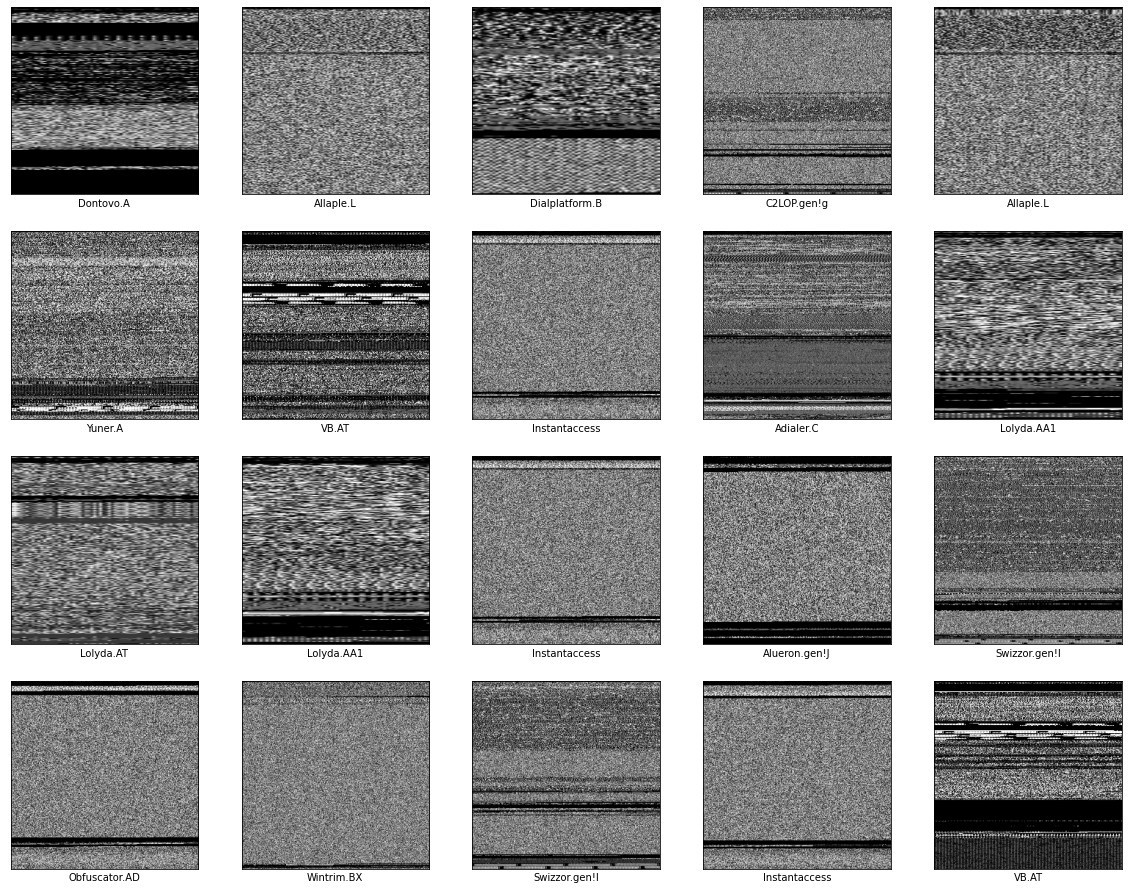

In [99]:
to_show = df.sample(20)

fig_size = (20, 20)
fig = plt.figure(figsize=fig_size)

id = 0
for index, row in to_show.iterrows():
    plt.subplot(5, 5, id + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(row['image'].astype(np.uint8))
    plt.xlabel(row['familyName'])
    id += 1

plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D

model = Sequential()
model.add(Convolution2D(32, (3, 3), strides=(1, 1), input_shape=(DIMENSION, DIMENSION, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(25, activation='sigmoid'))
print('input shape', model.input_shape)
print('output shape', model.output_shape)

In [ ]:
model.summary()